# Goal of this program is to extract Trapzoidal Data of the OFF current

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
from matplotlib import rcParams
from scipy.optimize import curve_fit
from scipy.ndimage import gaussian_filter
from scipy.signal import find_peaks
import pandas as pd
import sys
fpath = '/Users/LingxinW/Box/Wang/PythonStuff'
sys.path.append(fpath)
import heka_reader 

In [2]:
cd ~/Box/Wang/Ephys_recording/ALM_ephys/recordingfiles

C:\Users\LingxinW\Box\Wang\Ephys_recording\ALM_ephys\recordingfiles


In [53]:
myfile = heka_reader.Bundle ('191030.dat') # pick one specific recording file

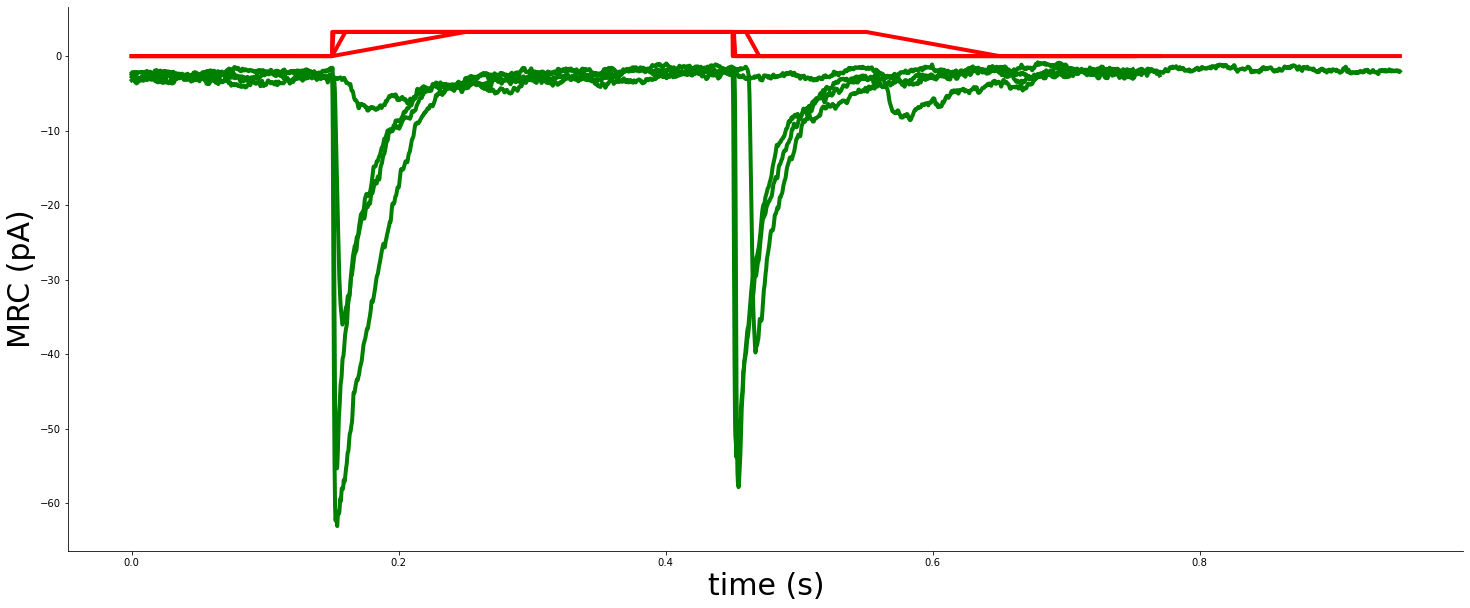

In [55]:


# Here is to analysis the Trapzoidal data in TrapRate X10

g=3 # group number -1 

x1 = np.arange(len(myfile.data[g,32,0,1]))/10000
x2 = np.arange(len(myfile.data[g,32,1,1]))/10000
x3 = np.arange(len(myfile.data[g,32,2,1]))/10000
x4 = np.arange(len(myfile.data[g,32,3,1]))/10000
#x5 = np.arange(len(myfile.data[2,21,4,1]))/10000
    
y1=stim_trap_swp1 = myfile.data[g,32,0,1]
y2=stim_trap_swp2 = myfile.data[g,32,1,1]
y3=stim_trap_swp3 = myfile.data[g,32,2,1]
y4=stim_trap_swp4 = myfile.data[g,32,3,1]
#stim_trap_swp5 = myfile.data[2,21,4,1]

# creat empty list of 1-5 sweeps and later put all three sweeps into this empty list
trap_swps=[]
sw1 = []
sw2 = []
sw3 = []
sw4 = []
sw5 = []

# create a for loop to collect 1-4 sweeps in three series
n=[32,37,42]
for i in n:
    sw1.append(myfile.data[g,i,0,0]*1000000000000)
    sw2.append(myfile.data[g,i,1,0]*1000000000000)
    sw3.append(myfile.data[g,i,2,0]*1000000000000)
    sw4.append(myfile.data[g,i,3,0]*1000000000000)
   # sw5.append(myfile.data[2,i,4,0]*1000000000000)
  
# Now calculate the mean of three repeats by averaging the nested lists (lists in lists)
# here I just want to print to give one expample of the mean of three same sweeps, here sweep #1.
xc1 = np.arange(len(myfile.data[g,32,0,0]))/10000
xc2 = np.arange(len(myfile.data[g,32,1,0]))/10000
xc3 = np.arange(len(myfile.data[g,32,2,0]))/10000
xc4 = np.arange(len(myfile.data[g,32,3,0]))/10000
#xc5 = np.arange(len(myfile.data[2,21,4,0]))/10000

sw1_mean = (sw1[0]+sw1[1]+sw1[2])/3
sw2_mean = (sw2[0]+sw2[1]+sw2[2])/3
sw3_mean = (sw3[0]+sw3[1]+sw3[2])/3
sw4_mean = (sw4[0]+sw4[1]+sw4[2])/3
#sw5_mean = (sw5[0]+sw5[1]+sw5[2])/3

trap_swps.append(sw1_mean)
trap_swps.append(sw2_mean)
trap_swps.append(sw3_mean)
trap_swps.append(sw4_mean)
#trap_swps.append(sw1_mean)

# plot the averaged traces

fig, ax = plt.subplots (figsize=(25,10)) # set figure size
ax.spines ['top'].set_visible (False)
ax.spines ['right'].set_visible (False)
ax.set_xlabel ('time (s)', fontsize = 30)
ax.set_ylabel ('MRC (pA)', fontsize = 30)

#plt.plot (x, y1, 'o', markersize = 8, color = 'b')
plt.plot (x1, stim_trap_swp1, 'r-', lw=4)
plt.plot (x2, stim_trap_swp2, 'r-', lw=4)
plt.plot (x3, stim_trap_swp3, 'r-', lw=4)
plt.plot (x4, stim_trap_swp4, 'r-', lw=4)
#plt.plot (x5, stim_trap_swp5, 'r-', lw=4)

plt.plot (xc1, gaussian_filter (sw1_mean, 3), 'g-', lw=4)
plt.plot (xc2, gaussian_filter (sw2_mean, 3), 'g-', lw=4)
plt.plot (xc3, gaussian_filter (sw3_mean, 3), 'g-', lw=4)
plt.plot (xc4, gaussian_filter (sw4_mean, 3), 'g-', lw=4)
#plt.plot (xc5, gaussian_filter (sw5_mean, 3), 'g-', lw=4)

In [6]:
(np.argmax(-gaussian_filter(trap_swps[0][4000:6000],3))+4000)/10000
(np.argmin(np.diff(gaussian_filter(np.diff(y1[4000:6000]),3)))+4000)/10000
(((np.argmax(gaussian_filter(trap_swps[0][m:7000],3) > (amp_peaks_off[0]*0.5))+m)*(1/10000)) - t_peaks_off[])*1000

SyntaxError: invalid syntax (<ipython-input-6-c0c360718ab5>, line 3)

In [56]:
#TrapRate x10

t_peaks_off = []
amp_peaks_off = []


# it is very important to creat loops to fill the ampty lists
# do not forget to smooth the mean traces using gaussian_filter function
for i in range (4):
    t_peaks_off.append((np.argmax(-gaussian_filter(trap_swps[i][4000:6000],3))+4000)/10000)
    amp_peaks_off.append(gaussian_filter(trap_swps[i],3)[np.argmax(-gaussian_filter(trap_swps[i][4000:6000],3))+4000])
   
    #t_peaks_off.append(((np.argmax(-mrc_swps[i][2000:3500]))+2000)/5000)
    #amp_peaks_off.append(mrc_swps[i][np.argmax(-mrc_swps[i][2000:3500])+2000])
t_start_act_off = []
#This for loop is to calculate the starting point of off current
y = [y1,y2,y3,y4]
for i in range (0,4):
    t_start_act_off.append((np.argmin(np.diff(gaussian_filter(np.diff(y[i][4000:6000]),3)))+4000)/10000)


t_half_act_off = [] # trap_on current half-time to maximum current

# you cannot calculate list minus list directly
# calculation should only happen elements by elements
# here time point switch from second - s to milisecond - ms by dividing time with 1000
for i in range (4):
    t_half_act_off.append(((t_peaks_off [i] - t_start_act_off[i])/2)*1000)
    
    
t_half_decay_off = []


for i in range (4):
    n=t_peaks_off[i]*10000
    m=int(n)
    t_half_decay_off.append ((((np.argmax(gaussian_filter(trap_swps[i][m:7000],3) > (amp_peaks_off[i]*0.5))+m)*(1/10000)) - t_peaks_off[i])*1000)
       
trap_rate = [80,800,7272,13333]
worm_strain = 4*['TU2769']
cell_ID = 4*['ALMLW012']


TrapData = {'worm_strain': worm_strain, 'cell_ID': cell_ID,'trap_rate': trap_rate, 'amp_peaks_off': amp_peaks_off, 't_peaks_off':t_peaks_off, \
            't_start_act_off': t_start_act_off, 't_half_act_off': t_half_act_off,'t_half_decay_off': t_half_decay_off, 'group_number': g+1}
TrapDataFrame = pd.DataFrame(TrapData)
#EphysDataFrame = EphysDataFrame.set_index(['cell_ID'])    
                        
dfpath = 'C:/Users/LingxinW/Box/Wang/Ephys_recording/ALM_ephys/ExtractedData/TrapData/TrapData_off/' 
##C:\Users\LingxinW\Box\Wang\Ephys_recording\ALM_ephys

#wb = pd.ExcelWriter(dfpath +'ALMLW001.xlsx', engine='xlsxwriter')
TrapDataFrame.to_csv(r'C:/Users/LingxinW/Box/Wang/Ephys_recording/ALM_ephys/ExtractedData/TrapData/TrapData_off/ALMLW012_trapx10.csv',index =False, index_label = 'stim_um')



In [57]:
myfile = heka_reader.Bundle ('191030.dat') # pick one specific recording file

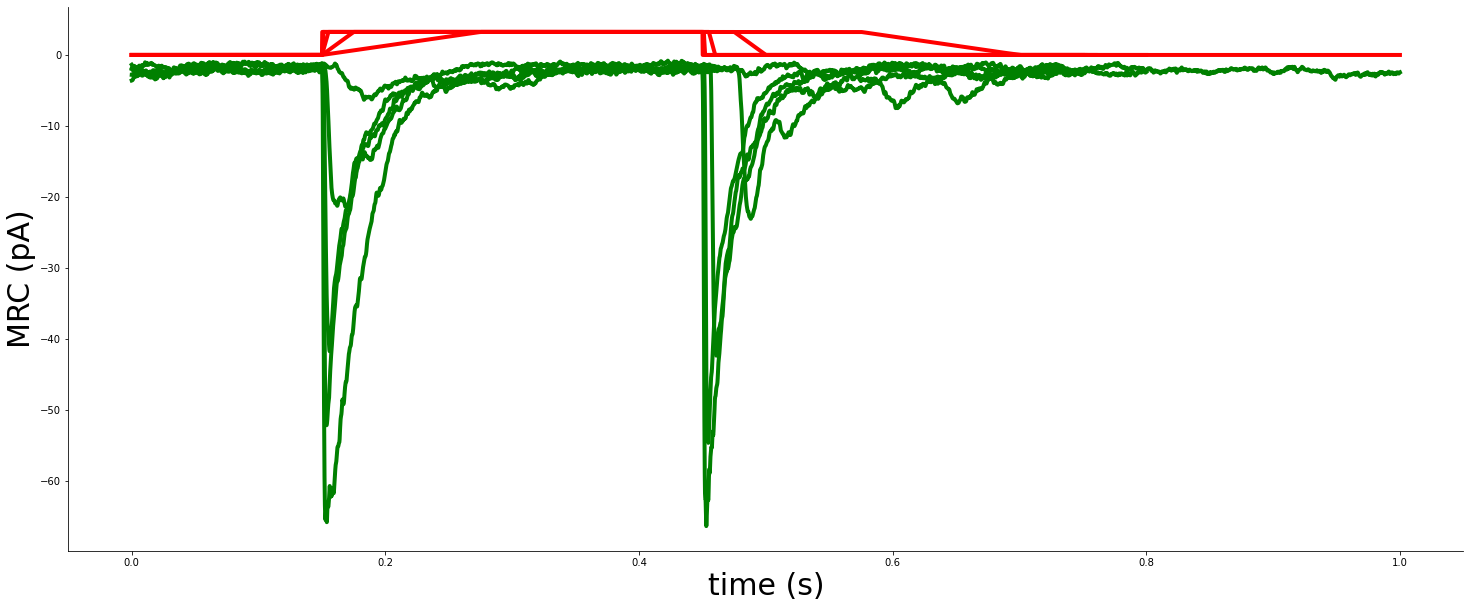

In [58]:
# Here is to analysis the Trapzoidal data in TrapRate X5

g=3

x1 = np.arange(len(myfile.data[g,33,0,1]))/10000
x2 = np.arange(len(myfile.data[g,33,1,1]))/10000
x3 = np.arange(len(myfile.data[g,33,2,1]))/10000
x4 = np.arange(len(myfile.data[g,33,3,1]))/10000
x5 = np.arange(len(myfile.data[g,33,4,1]))/10000
    
y1=stim_trap_swp1 = myfile.data[g,33,0,1]
y2=stim_trap_swp2 = myfile.data[g,33,1,1]
y3=stim_trap_swp3 = myfile.data[g,33,2,1]
y4=stim_trap_swp4 = myfile.data[g,33,3,1]
y5=stim_trap_swp5 = myfile.data[g,33,4,1]

# creat empty list of 1-5 sweeps and later put all three sweeps into this empty list
trap_swps=[]
sw1 = []
sw2 = []
sw3 = []
sw4 = []
sw5 = []

# create a for loop to collect 1-4 sweeps in three series
n=[33,38,43]
for i in n:
    sw1.append(myfile.data[g,i,0,0]*1000000000000)
    sw2.append(myfile.data[g,i,1,0]*1000000000000)
    sw3.append(myfile.data[g,i,2,0]*1000000000000)
    sw4.append(myfile.data[g,i,3,0]*1000000000000)
    sw5.append(myfile.data[g,i,4,0]*1000000000000)
  
# Now calculate the mean of three repeats by averaging the nested lists (lists in lists)
# here I just want to print to give one expample of the mean of three same sweeps, here sweep #1.
xc1 = np.arange(len(myfile.data[g,33,0,0]))/10000
xc2 = np.arange(len(myfile.data[g,33,1,0]))/10000
xc3 = np.arange(len(myfile.data[g,33,2,0]))/10000
xc4 = np.arange(len(myfile.data[g,33,3,0]))/10000
xc5 = np.arange(len(myfile.data[g,33,4,0]))/10000

sw1_mean = (sw1[0]+sw1[1]+sw1[2])/3
sw2_mean = (sw2[0]+sw2[1]+sw2[2])/3
sw3_mean = (sw3[0]+sw3[1]+sw3[2])/3
sw4_mean = (sw4[0]+sw4[1]+sw4[2])/3
sw5_mean = (sw5[0]+sw5[1]+sw5[2])/3

trap_swps.append(sw1_mean)
trap_swps.append(sw2_mean)
trap_swps.append(sw3_mean)
trap_swps.append(sw4_mean)
trap_swps.append(sw5_mean)

# plot the averaged traces

fig, ax = plt.subplots (figsize=(25,10)) # set figure size
ax.spines ['top'].set_visible (False)
ax.spines ['right'].set_visible (False)
ax.set_xlabel ('time (s)', fontsize = 30)
ax.set_ylabel ('MRC (pA)', fontsize = 30)

#plt.plot (x, y1, 'o', markersize = 8, color = 'b')
plt.plot (x1, stim_trap_swp1, 'r-', lw=4)
plt.plot (x2, stim_trap_swp2, 'r-', lw=4)
plt.plot (x3, stim_trap_swp3, 'r-', lw=4)
plt.plot (x4, stim_trap_swp4, 'r-', lw=4)
plt.plot (x5, stim_trap_swp5, 'r-', lw=4)

plt.plot (xc1, gaussian_filter (sw1_mean, 3), 'g-', lw=4)
plt.plot (xc2, gaussian_filter (sw2_mean, 3), 'g-', lw=4)
plt.plot (xc3, gaussian_filter (sw3_mean, 3), 'g-', lw=4)
plt.plot (xc4, gaussian_filter (sw4_mean, 3), 'g-', lw=4)
plt.plot (xc5, gaussian_filter (sw5_mean, 3), 'g-', lw=4)

In [59]:
#TrapRate x5

t_peaks_off = []
amp_peaks_off = []


# it is very important to creat loops to fill the ampty lists
# do not forget to smooth the mean traces using gaussian_filter function
for i in range (5):
    t_peaks_off.append((np.argmax(-gaussian_filter(trap_swps[i][4000:7000],3))+4000)/10000)
    amp_peaks_off.append(gaussian_filter(trap_swps[i],3)[np.argmax(-gaussian_filter(trap_swps[i][4000:7000],3))+4000])
   
    #t_peaks_off.append(((np.argmax(-mrc_swps[i][2000:3500]))+2000)/5000)
    #amp_peaks_off.append(mrc_swps[i][np.argmax(-mrc_swps[i][2000:3500])+2000])
t_start_act_off = []
#This for loop is to calculate the starting point of off current
y = [y1,y2,y3,y4,y5]
for i in range (0,5):
    t_start_act_off.append((np.argmin(np.diff(gaussian_filter(np.diff(y[i][4000:7000]),3)))+4000)/10000)


t_half_act_off = [] # trap_on current half-time to maximum current

# you cannot calculate list minus list directly
# calculation should only happen elements by elements
# here time point switch from second - s to milisecond - ms by dividing time with 1000
for i in range (5):
    t_half_act_off.append(((t_peaks_off [i] - t_start_act_off[i])/2)*1000)
    
    
t_half_decay_off = []


for i in range (5):
    n=t_peaks_off[i]*10000
    m=int(n)
    t_half_decay_off.append ((((np.argmax(gaussian_filter(trap_swps[i][m:8000],3) > (amp_peaks_off[i]*0.5))+m)*(1/10000)) - t_peaks_off[i])*1000)
       
trap_rate = [63,320,1568,7272,13333]
worm_strain = 5*['TU2769']
cell_ID = 5*['ALMLW012']


TrapData = {'worm_strain': worm_strain, 'cell_ID': cell_ID,'trap_rate': trap_rate, 'amp_peaks_off': amp_peaks_off, 't_peaks_off':t_peaks_off, \
            't_start_act_off': t_start_act_off, 't_half_act_off': t_half_act_off,'t_half_decay_off': t_half_decay_off, 'group_number': g+1}
TrapDataFrame = pd.DataFrame(TrapData)
#EphysDataFrame = EphysDataFrame.set_index(['cell_ID'])    
                        
dfpath = 'C:/Users/LingxinW/Box/Wang/Ephys_recording/ALM_ephys/ExtractedData/TrapData_off/' 
##C:\Users\LingxinW\Box\Wang\Ephys_recording\ALM_ephys

#wb = pd.ExcelWriter(dfpath +'ALMLW001.xlsx', engine='xlsxwriter')
TrapDataFrame.to_csv(r'C:/Users/LingxinW/Box/Wang/Ephys_recording/ALM_ephys/ExtractedData/TrapData/TrapData_off/ALMLW012_trapx5.csv',index =False, index_label = 'stim_um')


In [60]:
myfile = heka_reader.Bundle ('191030.dat') # pick one specific recording file

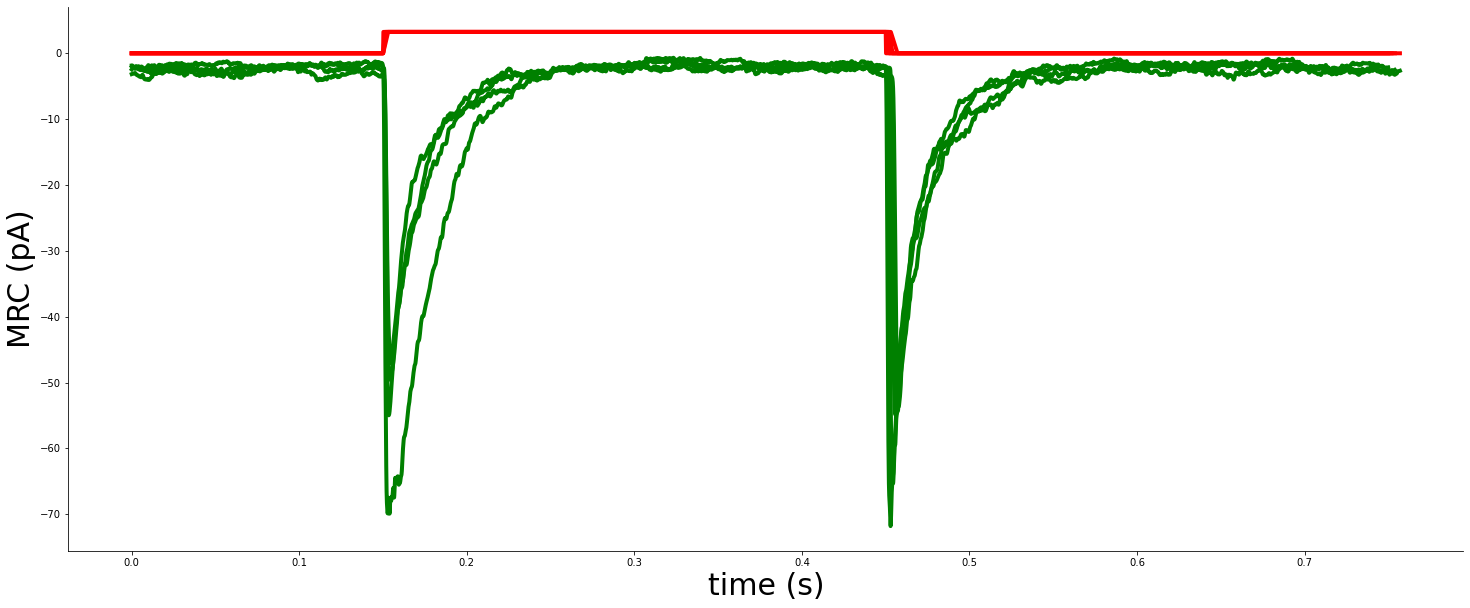

In [62]:
# Here is to analysis the Trapzoidal data in TrapRate x2

g=3 

x1 = np.arange(len(myfile.data[g,35,0,1]))/10000
x2 = np.arange(len(myfile.data[g,35,1,1]))/10000
x3 = np.arange(len(myfile.data[g,35,2,1]))/10000
x4 = np.arange(len(myfile.data[g,35,3,1]))/10000
#x5 = np.arange(len(myfile.data[g,22,4,1]))/10000
    
y1=stim_trap_swp1 = myfile.data[g,35,0,1]
y2=stim_trap_swp2 = myfile.data[g,35,1,1]
y3=stim_trap_swp3 = myfile.data[g,35,2,1]
y4=stim_trap_swp4 = myfile.data[g,35,3,1]
#y5=stim_trap_swp5 = myfile.data[g,22,4,1]

# creat empty list of 1-5 sweeps and later put all three sweeps into this empty list
trap_swps=[]
sw1 = []
sw2 = []
sw3 = []
sw4 = []
sw5 = []

# create a for loop to collect 1-4 sweeps in three series
n=[35,40,45]
for i in n:
    sw1.append(myfile.data[g,i,0,0]*1000000000000)
    sw2.append(myfile.data[g,i,1,0]*1000000000000)
    sw3.append(myfile.data[g,i,2,0]*1000000000000)
    sw4.append(myfile.data[g,i,3,0]*1000000000000)
    #sw5.append(myfile.data[g,i,4,0]*1000000000000)
  
# Now calculate the mean of three repeats by averaging the nested lists (lists in lists)
# here I just want to print to give one expample of the mean of three same sweeps, here sweep #1.
xc1 = np.arange(len(myfile.data[g,35,0,0]))/10000
xc2 = np.arange(len(myfile.data[g,35,1,0]))/10000
xc3 = np.arange(len(myfile.data[g,35,2,0]))/10000
xc4 = np.arange(len(myfile.data[g,35,3,0]))/10000
#xc5 = np.arange(len(myfile.data[g,22,4,0]))/10000

sw1_mean = (sw1[0]+sw1[1]+sw1[2])/3
sw2_mean = (sw2[0]+sw2[1]+sw2[2])/3
sw3_mean = (sw3[0]+sw3[1]+sw3[2])/3
sw4_mean = (sw4[0]+sw4[1]+sw4[2])/3
#sw5_mean = (sw5[0]+sw5[1]+sw5[2])/3

trap_swps.append(sw1_mean)
trap_swps.append(sw2_mean)
trap_swps.append(sw3_mean)
trap_swps.append(sw4_mean)
#trap_swps.append(sw5_mean)

# plot the averaged traces

fig, ax = plt.subplots (figsize=(25,10)) # set figure size
ax.spines ['top'].set_visible (False)
ax.spines ['right'].set_visible (False)
ax.set_xlabel ('time (s)', fontsize = 30)
ax.set_ylabel ('MRC (pA)', fontsize = 30)

#plt.plot (x, y1, 'o', markersize = 8, color = 'b')
plt.plot (x1, stim_trap_swp1, 'r-', lw=4)
plt.plot (x2, stim_trap_swp2, 'r-', lw=4)
plt.plot (x3, stim_trap_swp3, 'r-', lw=4)
plt.plot (x4, stim_trap_swp4, 'r-', lw=4)
#plt.plot (x5, stim_trap_swp5, 'r-', lw=4)

plt.plot (xc1, gaussian_filter (sw1_mean, 3), 'g-', lw=4)
plt.plot (xc2, gaussian_filter (sw2_mean, 3), 'g-', lw=4)
plt.plot (xc3, gaussian_filter (sw3_mean, 3), 'g-', lw=4)
plt.plot (xc4, gaussian_filter (sw4_mean, 3), 'g-', lw=4)
#plt.plot (xc5, gaussian_filter (sw5_mean, 3), 'g-', lw=4)

In [63]:
#TrapRate x2

t_peaks_off = []
amp_peaks_off = []


# it is very important to creat loops to fill the ampty lists
# do not forget to smooth the mean traces using gaussian_filter function
for i in range (4):
    t_peaks_off.append((np.argmax(-gaussian_filter(trap_swps[i][4000:6000],3))+4000)/10000)
    amp_peaks_off.append(gaussian_filter(trap_swps[i],3)[np.argmax(-gaussian_filter(trap_swps[i][4000:6000],3))+4000])
   
    #t_peaks_off.append(((np.argmax(-mrc_swps[i][2000:3500]))+2000)/5000)
    #amp_peaks_off.append(mrc_swps[i][np.argmax(-mrc_swps[i][2000:3500])+2000])
t_start_act_off = []
#This for loop is to calculate the starting point of off current
y = [y1,y2,y3,y4]
for i in range (0,4):
    t_start_act_off.append((np.argmin(np.diff(gaussian_filter(np.diff(y[i][4000:6000]),3)))+4000)/10000)


t_half_act_off = [] # trap_on current half-time to maximum current

# you cannot calculate list minus list directly
# calculation should only happen elements by elements
# here time point switch from second - s to milisecond - ms by dividing time with 1000
for i in range (4):
    t_half_act_off.append(((t_peaks_off [i] - t_start_act_off[i])/2)*1000)
    
    
t_half_decay_off = []


for i in range (4):
    n=t_peaks_off[i]*10000
    m=int(n)
    t_half_decay_off.append ((((np.argmax(gaussian_filter(trap_swps[i][m:6000],3) > (amp_peaks_off[i]*0.5))+m)*(1/10000)) - t_peaks_off[i])*1000)
       
trap_rate = [2580,3809,7272,13333]
worm_strain = 4*['TU2769']
cell_ID = 4*['ALMLW012']


TrapData = {'worm_strain': worm_strain, 'cell_ID': cell_ID,'trap_rate': trap_rate, 'amp_peaks_off': amp_peaks_off, 't_peaks_off':t_peaks_off, \
            't_start_act_off': t_start_act_off, 't_half_act_off': t_half_act_off,'t_half_decay_off': t_half_decay_off, 'group_number': g+1}
TrapDataFrame = pd.DataFrame(TrapData)
#EphysDataFrame = EphysDataFrame.set_index(['cell_ID'])    
                        
dfpath = 'C:/Users/LingxinW/Box/Wang/Ephys_recording/ALM_ephys/ExtractedData/TrapData_off/' 
##C:\Users\LingxinW\Box\Wang\Ephys_recording\ALM_ephys

#wb = pd.ExcelWriter(dfpath +'ALMLW001.xlsx', engine='xlsxwriter')
TrapDataFrame.to_csv(r'C:/Users/LingxinW/Box/Wang/Ephys_recording/ALM_ephys/ExtractedData/TrapData/TrapData_off/ALMLW012_trapx2.csv',index =False, index_label = 'stim_um')



In [64]:
myfile = heka_reader.Bundle ('191030.dat') # pick one specific recording file

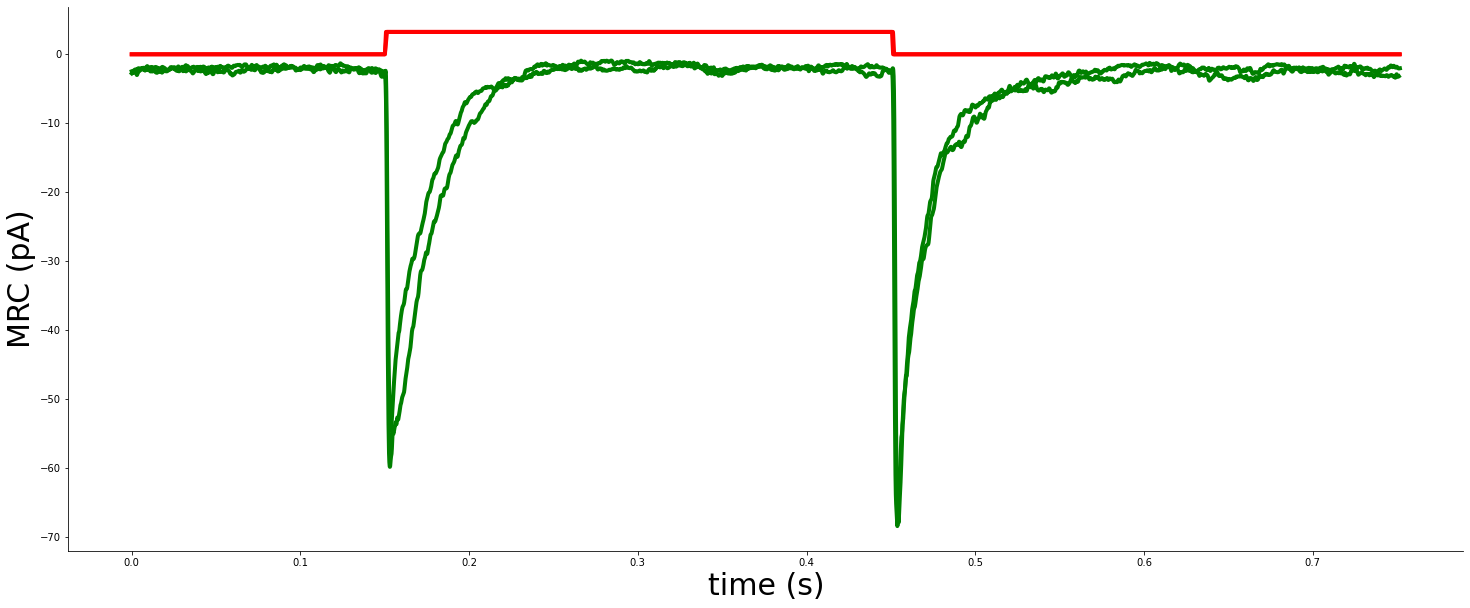

In [65]:
# Here is to analysis the Trapzoidal data in TrapRate 1

g=3 

x1 = np.arange(len(myfile.data[g,36,0,1]))/10000
x2 = np.arange(len(myfile.data[g,36,1,1]))/10000
#x3 = np.arange(len(myfile.data[g,22,2,1]))/10000
#x4 = np.arange(len(myfile.data[g,22,3,1]))/10000
#x5 = np.arange(len(myfile.data[g,22,4,1]))/10000
    
y1=stim_trap_swp1 = myfile.data[g,36,0,1]
y2=stim_trap_swp2 = myfile.data[g,36,1,1]
#y3=stim_trap_swp3 = myfile.data[g,22,2,1]
#y4=stim_trap_swp4 = myfile.data[g,22,3,1]
#y5=stim_trap_swp5 = myfile.data[g,22,4,1]

# creat empty list of 1-5 sweeps and later put all three sweeps into this empty list
trap_swps=[]
sw1 = []
sw2 = []
sw3 = []
sw4 = []
sw5 = []

# create a for loop to collect 1-4 sweeps in three series
n=[36,41,46]
for i in n:
    sw1.append(myfile.data[g,i,0,0]*1000000000000)
    sw2.append(myfile.data[g,i,1,0]*1000000000000)
    #sw3.append(myfile.data[g,i,2,0]*1000000000000)
    #sw4.append(myfile.data[g,i,3,0]*1000000000000)
    #sw5.append(myfile.data[g,i,4,0]*1000000000000)
  
# Now calculate the mean of three repeats by averaging the nested lists (lists in lists)
# here I just want to print to give one expample of the mean of three same sweeps, here sweep #1.
xc1 = np.arange(len(myfile.data[g,36,0,0]))/10000
xc2 = np.arange(len(myfile.data[g,36,1,0]))/10000
#xc3 = np.arange(len(myfile.data[g,22,2,0]))/10000
#xc4 = np.arange(len(myfile.data[g,22,3,0]))/10000
#xc5 = np.arange(len(myfile.data[g,22,4,0]))/10000

sw1_mean = (sw1[0]+sw1[1]+sw1[2])/3
sw2_mean = (sw2[0]+sw2[1]+sw2[2])/3
#sw3_mean = (sw3[0]+sw3[1]+sw3[2])/3
#sw4_mean = (sw4[0]+sw4[1]+sw4[2])/3
#sw5_mean = (sw5[0]+sw5[1]+sw5[2])/3

trap_swps.append(sw1_mean)
trap_swps.append(sw2_mean)
#trap_swps.append(sw3_mean)
#trap_swps.append(sw4_mean)
#trap_swps.append(sw5_mean)

# plot the averaged traces

fig, ax = plt.subplots (figsize=(25,10)) # set figure size
ax.spines ['top'].set_visible (False)
ax.spines ['right'].set_visible (False)
ax.set_xlabel ('time (s)', fontsize = 30)
ax.set_ylabel ('MRC (pA)', fontsize = 30)

#plt.plot (x, y1, 'o', markersize = 8, color = 'b')
plt.plot (x1, stim_trap_swp1, 'r-', lw=4)
plt.plot (x2, stim_trap_swp2, 'r-', lw=4)
#plt.plot (x3, stim_trap_swp3, 'r-', lw=4)
#plt.plot (x4, stim_trap_swp4, 'r-', lw=4)
#plt.plot (x5, stim_trap_swp5, 'r-', lw=4)

plt.plot (xc1, gaussian_filter (sw1_mean, 3), 'g-', lw=4)
plt.plot (xc2, gaussian_filter (sw2_mean, 3), 'g-', lw=4)
#plt.plot (xc3, gaussian_filter (sw3_mean, 3), 'g-', lw=4)
#plt.plot (xc4, gaussian_filter (sw4_mean, 3), 'g-', lw=4)
#plt.plot (xc5, gaussian_filter (sw5_mean, 3), 'g-', lw=4)

In [66]:
#TrapRate 1

t_peaks_off = []
amp_peaks_off = []


# it is very important to creat loops to fill the ampty lists
# do not forget to smooth the mean traces using gaussian_filter function
for i in range (2):
    t_peaks_off.append((np.argmax(-gaussian_filter(trap_swps[i][4000:6000],3))+4000)/10000)
    amp_peaks_off.append(gaussian_filter(trap_swps[i],3)[np.argmax(-gaussian_filter(trap_swps[i][4000:6000],3))+4000])
   
    #t_peaks_off.append(((np.argmax(-mrc_swps[i][2000:3500]))+2000)/5000)
    #amp_peaks_off.append(mrc_swps[i][np.argmax(-mrc_swps[i][2000:3500])+2000])
t_start_act_off = []
#This for loop is to calculate the starting point of off current
y = [y1,y2]
for i in range (0,2):
    t_start_act_off.append((np.argmin(np.diff(gaussian_filter(np.diff(y[i][4000:6000]),3)))+4000)/10000)


t_half_act_off = [] # trap_on current half-time to maximum current

# you cannot calculate list minus list directly
# calculation should only happen elements by elements
# here time point switch from second - s to milisecond - ms by dividing time with 1000
for i in range (2):
    t_half_act_off.append(((t_peaks_off [i] - t_start_act_off[i])/2)*1000)
    
    
t_half_decay_off = []


for i in range (2):
    n=t_peaks_off[i]*10000
    m=int(n)
    t_half_decay_off.append ((((np.argmax(gaussian_filter(trap_swps[i][m:6000],3) > (amp_peaks_off[i]*0.5))+m)*(1/10000)) - t_peaks_off[i])*1000)
       
trap_rate = [6153,11428]
worm_strain = 2*['TU2769']
cell_ID = 2*['ALMLW012']


TrapData = {'worm_strain': worm_strain, 'cell_ID': cell_ID,'trap_rate': trap_rate, 'amp_peaks_off': amp_peaks_off, 't_peaks_off':t_peaks_off, \
            't_start_act_off': t_start_act_off, 't_half_act_off': t_half_act_off,'t_half_decay_off': t_half_decay_off, 'group_number': g+1}
TrapDataFrame = pd.DataFrame(TrapData)
#EphysDataFrame = EphysDataFrame.set_index(['cell_ID'])    
                        
dfpath = 'C:/Users/LingxinW/Box/Wang/Ephys_recording/ALM_ephys/ExtractedData/TrapData_off/' 
##C:\Users\LingxinW\Box\Wang\Ephys_recording\ALM_ephys

#wb = pd.ExcelWriter(dfpath +'ALMLW001.xlsx', engine='xlsxwriter')
TrapDataFrame.to_csv(r'C:/Users/LingxinW/Box/Wang/Ephys_recording/ALM_ephys/ExtractedData/TrapData/TrapData_off/ALMLW012_trap1.csv',index =False, index_label = 'stim_um')

